In [122]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os

In [71]:
path = os.getcwd()
print(path)

/Users/jan/Dropbox/UP_EPQM/2222/MA/powerlinemonsters


In [92]:
df02 =  pd.read_excel(f'{path}/data/elections/btw/ags_trans/2002.xlsx', converters = {'Land': str, 'RB': str, 'Kreis': str, 'VB': str, 'Gem': str})
df05 =  pd.read_excel(f'{path}/data/elections/btw/ags_trans/2005.xlsx', converters = {'Land': str, 'RB': str, 'Kreis': str, 'VB': str, 'Gem': str})
df09 =  pd.read_excel(f'{path}/data/elections/btw/ags_trans/2009.xlsx', converters = {'Land': str, 'RB': str, 'Kreis': str, 'VB': str, 'Gem': str})
df13 =  pd.read_excel(f'{path}/data/elections/btw/ags_trans/2013.xlsx', converters = {'Land': str, 'RB': str, 'Kreis': str, 'VB': str, 'Gem': str})
df17 =  pd.read_excel(f'{path}/data/elections/btw/ags_trans/2017.xlsx', converters = {'Land': str, 'RB': str, 'Kreis': str, 'VB': str, 'Gem': str})

In [73]:
df17.head()

,Land,RB,Kreis,VB,Gem,Gemeindename
0,01,NaN,NaN,NaN,NaN,Schleswig-Holstein
1,01,0,01,NaN,NaN,"Flensburg, Stadt"
2,01,0,01,0000,NaN,"Flensburg, Stadt"
3,01,0,01,0000,000,"Flensburg, Stadt"
4,01,0,02,NaN,NaN,"Kiel, Landeshauptstadt"


In [93]:
dfs = [df02, df05, df09, df13, df17]
for df in dfs:
    try:
        df.insert(loc=0, column='AGS', value=0)
    except Exception:
        pass
    df['AGS'] = df['Land'] + df['RB'] + df['Kreis'] + df['Gem']
    df = df.sort_values(['AGS'])
    df = df.dropna(axis='rows', how='any', subset=['AGS'])
    df = df.reindex(columns=['AGS', 'Gemeindename'])

In [94]:
df02 = df02.dropna(axis='rows', how='any', subset=['AGS'])
df05 = df05.dropna(axis='rows', how='any', subset=['AGS'])
df09 = df09.dropna(axis='rows', how='any', subset=['AGS'])
df13 = df13.dropna(axis='rows', how='any', subset=['AGS'])
df17 = df17.dropna(axis='rows', how='any', subset=['AGS'])
df02 = df02.reindex(columns=['AGS', 'Gemeindename'])
df05 = df05.reindex(columns=['AGS', 'Gemeindename'])
df09 = df09.reindex(columns=['AGS', 'Gemeindename'])
df13 = df13.reindex(columns=['AGS', 'Gemeindename'])
df17 = df17.reindex(columns=['AGS', 'Gemeindename'])
df02.rename(columns = {'AGS':'AGS_02', 'Gemeindename': 'Gemeindename_02'}, inplace = True)
df05.rename(columns = {'AGS':'AGS_05', 'Gemeindename': 'Gemeindename_05'}, inplace = True)
df09.rename(columns = {'AGS':'AGS_09', 'Gemeindename': 'Gemeindename_09'}, inplace = True)
df13.rename(columns = {'AGS':'AGS_13', 'Gemeindename': 'Gemeindename_13'}, inplace = True)
df17.rename(columns = {'AGS':'AGS_17', 'Gemeindename': 'Gemeindename_17'}, inplace = True)
df17.head()

,AGS_17,Gemeindename_17
3,01001000,"Flensburg, Stadt"
6,01002000,"Kiel, Landeshauptstadt"
9,01003000,"Lübeck, Hansestadt"
12,01004000,"Neumünster, Stadt"
15,01051011,"Brunsbüttel, Stadt"


In [108]:
df0213 = pd.merge(df02, df13, how='left', left_on='AGS_02', right_on='AGS_13', indicator=True)
print(df0213['_merge'].describe())

count     13222
unique        2
top        both
freq       9694
Name: _merge, dtype: object


In [109]:
df0513 = pd.merge(df05, df13, how='left', left_on='AGS_05', right_on='AGS_13', indicator=True)
print(df0513['_merge'].describe())

count     12415
unique        2
top        both
freq       9744
Name: _merge, dtype: object


In [110]:
df0913 = pd.merge(df09, df13, how='left', left_on='AGS_09', right_on='AGS_13', indicator=True)
print(df0913['_merge'].describe())

count     12067
unique        2
top        both
freq      10385
Name: _merge, dtype: object


In [111]:
df1713 = pd.merge(df17, df13, how='left', left_on='AGS_17', right_on='AGS_13', indicator=True)
print(df1713['_merge'].describe())

count     11137
unique        2
top        both
freq      11070
Name: _merge, dtype: object


In [118]:
df = pd.merge(df13, df02, how='left', left_on='AGS_13', right_on='AGS_02', indicator='merge0213')
df = pd.merge(df, df05, how='left', left_on='AGS_13', right_on='AGS_05', indicator='merge0513')
df = pd.merge(df, df09, how='left', left_on='AGS_13', right_on='AGS_09', indicator='merge0913')
df = pd.merge(df, df17, how='left', left_on='AGS_13', right_on='AGS_17', indicator='merge1713')

In [106]:
df['ags_dup'] = df.duplicated(subset=['AGS_13'], keep=False)

In [119]:
df = df.groupby(['AGS_13'], as_index=False).first()

In [120]:
df = df
vars = ['merge0213', 'merge0513', 'merge0913', 'merge1713']
for var in vars:
    df = df[df[var] == 'both']

In [121]:
df = df.reindex(columns=['Gemeindename_13', 'AGS_13'])
df.rename(columns = {'AGS_13':'AGS', 'Gemeindename_13':'Gemeindename'}, inplace = True)
df.to_csv(f'{path}/data/ags_trans.csv', encoding = 'utf-8-sig')
df.head()

,Gemeindename,AGS
0,"Flensburg, Stadt",01001000
1,"Kiel, Landeshauptstadt",01002000
2,"Lübeck, Hansestadt",01003000
3,"Neumünster, Stadt",01004000
4,Albersdorf,01051001


In [134]:
municipalities = gpd.read_file(f'{path}/data/geodata/VG250_GEM.shp')
states = gpd.read_file(f'{path}/data/geodata/VG250_LAN.shp')
powerlines = gpd.read_file(f'{path}/data/geodata/powerlines.shp'
matched_mun_pd = pd.merge(df, municipalities, on='AGS', how='left', indicator=True).drop(columns='geometry')
matched_mun  = pd.merge(municipalities, df, on='AGS', how='left', indicator=True)
matched_mun = matched_mun[matched_mun['_merge'] == 'both']
print(matched_mun_pd['_merge'].describe())

count     9668
unique       2
top       both
freq      9626
Name: _merge, dtype: object


<AxesSubplot:>

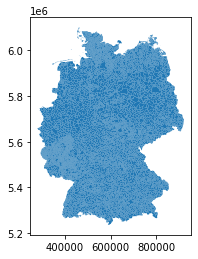

In [135]:
fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
ax.set_aspect('equal')
ax.set_axis_off()
municipalities.plot(ax=ax, color='lightblue', zorder=1)
states.boundary.plot(ax=ax, color='black', lw = 0.1, zorder=2)
powerlines.plot(ax=ax, color='red', lw=2, zorder=3)
plt.title('Not merged municipalities', fontsize=14)
plt.savefig(f'{path}/figures/not_merged.png')
plt.close()

<AxesSubplot:>

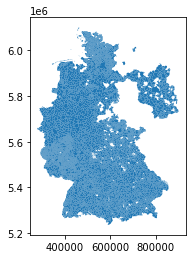

In [136]:
matched_mun.plot()